# Overview
The notebook is the exercises of the Python Programming for Finance tutorial at https://www.pythonprogramming.net/getting-stock-prices-python-programming-for-finance/

Fixed Yahoo Finance:
https://github.com/ranaroussi/fix-yahoo-finance

# Exercises

## Setup

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import fix_yahoo_finance

%matplotlib inline
style.use('ggplot')

## Grab Historical Stock Data from Yahoo Finance

In [2]:
start = "2000-01-01"
end = "2016-12-31"

df = web.get_data_yahoo('TSLA', start=start, end=end)
df.head()

[*********************100%***********************]  1 of 1 downloaded

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


## Save data as CSV file

In [3]:
df.to_csv('data/TSLA.csv')

## Load data from CSV file

In [4]:
df2 = pd.read_csv('data/TSLA.csv', parse_dates=True, index_col=0)
df2.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-23,208.000000,213.449997,207.710007,213.339996,213.339996,4662900
2016-12-27,214.880005,222.250000,214.419998,219.529999,219.529999,5915700
2016-12-28,221.529999,223.800003,217.199997,219.740005,219.740005,3782500
2016-12-29,218.559998,219.199997,214.119995,214.679993,214.679993,4045000
2016-12-30,216.300003,217.500000,211.679993,213.690002,213.690002,4642600


## Render graph

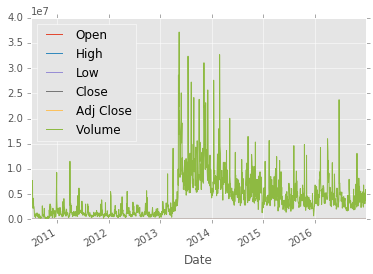

In [5]:
df.plot()

df['Adj Close'].plot()

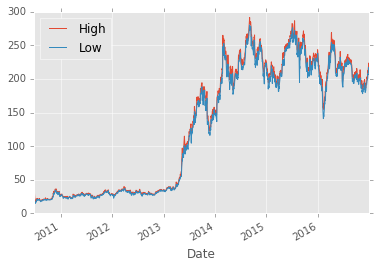

In [6]:
df[['High','Low']].plot()

## Simple Moving Average

In [7]:
df['100sma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
df.head()

,Open,High,Low,Close,Adj Close,Volume,100sma
Date,,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,23.889999
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,23.860000
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,23.226666
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,22.220000
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,20.998000


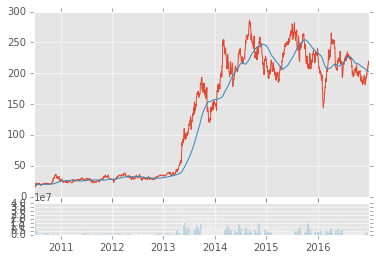

In [8]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100sma'])
ax2.bar(df.index, df['Volume'])
plt.show()

## Create a candlestick / OHLC graph and Re-sampling

In [9]:
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_ohlc.head()

,open,high,low,close
Date,,,,
2010-06-29,23.889999,23.889999,15.800000,17.459999
2010-07-09,17.400000,20.639999,17.049999,20.639999
2010-07-19,21.910000,21.910000,20.219999,20.719999
2010-07-29,20.350000,21.950001,19.590000,19.590000
2010-08-08,19.600000,19.600000,17.600000,19.150000


In [10]:
df_volume = df['Volume'].resample('10D').sum()
df_volume.head()

Date
2010-06-29    70812000
2010-07-09    19489500
2010-07-19     9184800
2010-07-29     5442600
2010-08-08     5150300
Freq: 10D, Name: Volume, dtype: int32

In [11]:
# remove the date column as index
df_ohlc = df_ohlc.reset_index()

# convert date to matplotlib dates
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

df_ohlc['Date'].head()

0    733952.0
1    733962.0
2    733972.0
3    733982.0
4    733992.0
Name: Date, dtype: float64

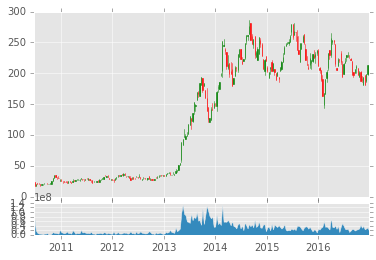

In [12]:
# fig = plt.figure()
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)
# convert raw mdate numbers to date
ax1.xaxis_date()
# ohlc graph
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
# volume
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)
plt.show()

## Getting the S&P 500 list

In [14]:
import bs4 as bs
import pickle
import requests

def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    #if the line above doesn't works, set headers
    #headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux i686) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1312.27 Safari/537.17'}
    #resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies', headers=headers)
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
        
    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers,f)
        
    return tickers

save_sp500_tickers()

['MMM',
 'ABT',
 'ABBV',
 'ACN',
 'ATVI',
 'AYI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AET',
 'AMG',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'AGN',
 'ADS',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'APC',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'ADM',
 'ARNC',
 'AJG',
 'AIZ',
 'T',
 'ADSK',
 'ADP',
 'AN',
 'AZO',
 'AVB',
 'AVY',
 'BHGE',
 'BLL',
 'BAC',
 'BK',
 'BCR',
 'BAX',
 'BBT',
 'BDX',
 'BBBY',
 'BRK.B',
 'BBY',
 'BIIB',
 'BLK',
 'HRB',
 'BA',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BF.B',
 'CHRW',
 'CA',
 'COG',
 'CPB',
 'COF',
 'CAH',
 'CBOE',
 'KMX',
 'CCL',
 'CAT',
 'CBG',
 'CBS',
 'CELG',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CHK',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'XEC',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'COH',
 'KO',
 'CTSH',
 'C